In [1]:
import gc
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%run utility.py

## Main Algorithm —— Logistic Regression Classification 

In [2]:
def Classify(sampling_method,data_array): 

    print("====================================")
    print("============="+sampling_method+"=============")
    print("====================================")
       
    x_train,y_train, x_test, y_test=load_imb_data(data_array,sampling_method)
        
    logistic_model=LogisticRegression(penalty='l2',C=1.0, solver='liblinear').fit(x_train,y_train) 
    y_pred=logistic_model.predict(x_test)

    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Compute Sensitivity (Recall or True Positive Rate)
    sensitivity = tp / (tp + fn)
    
    # Compute Specificity (True Negative Rate)
    specificity = tn / (tn + fp)
    
    # Print the results
    print(f"Sensitivity (Recall): {sensitivity:.2f}")
    print(f"Specificity (True Negative Rate): {specificity:.2f}")
    
    
    Print_Result(y_test, y_pred,"") 

## Set Base Directory for embedding files

In [3]:
base_dir = '../embeddings/pathogenecity/embedding-csv/'

## Load embedding file

In [ ]:
def load_embedding_file(csv_filename):

    # Load the Dask DataFrame with the specified dtypes
    df = dd.read_csv(csv_filename)
    
    # Inspect to get column names
    df_pandas_head = df.head(1)  
    
    column_names = [f'{i}' for i in range(1, len(df_pandas_head.columns))]
    column_names.extend(['y'])    
    df.columns = column_names
    
    df_pandas = df.compute()
    data_array = df_pandas.to_numpy()

    return data_array

### GPN

In [4]:
# df=pd.read_csv(base_dir + 'pathogenecity_gpn_noncoding.csv')
# column_names = [f'{i}' for i in range(1, len(df.columns) )]
# column_names.extend(['y'])
# df.columns = column_names
# df

=============UNDERSAMPLE=============
(2056, 768) (2056,) (19152, 768) (19152,)
Sensitivity (Recall): 0.67
Specificity (True Negative Rate): 0.55
              precision    recall  f1-score   support

         0.0       0.99      0.55      0.71     18895
         1.0       0.02      0.67      0.04       257

    accuracy                           0.55     19152
   macro avg       0.51      0.61      0.37     19152
weighted avg       0.98      0.55      0.70     19152

f1_score 0.038942037141249296
precision_score 0.02005099675475197
recall_score 0.6731517509727627
roc_auc_score 0.6128394372752144
confusion_matrix
 [[10440  8455]
 [   84   173]]


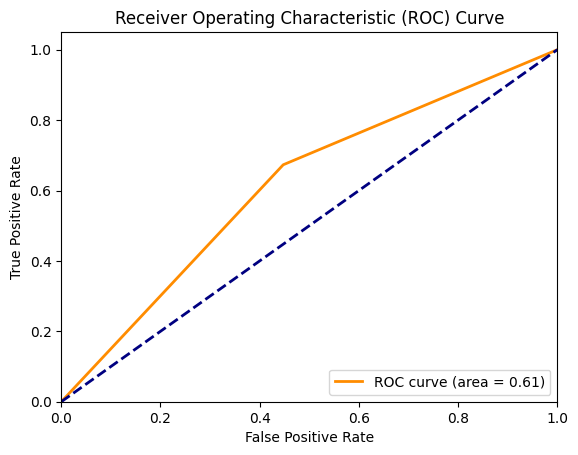

ROC AUC score: 0.6128394372752144
=============UNDERSAMPLE=============
(74860, 768) (74860,) (112038, 768) (112038,)
Sensitivity (Recall): 0.81
Specificity (True Negative Rate): 0.72
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83    102680
         1.0       0.21      0.81      0.33      9358

    accuracy                           0.73    112038
   macro avg       0.59      0.77      0.58    112038
weighted avg       0.91      0.73      0.79    112038

f1_score 0.33217372278744123
precision_score 0.20884804798195175
recall_score 0.8111776020517204
roc_auc_score 0.7655615318400402
confusion_matrix
 [[73924 28756]
 [ 1767  7591]]


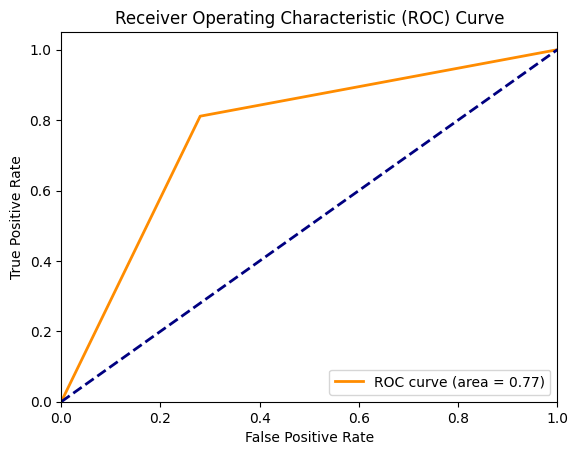

ROC AUC score: 0.7655615318400402


In [5]:
# Classify() can be called by any of the following methods: 
# "UNDERSAMPLE", "OVERSAMPLE", "ADASYN", "SMOTE","SMOTEENN","NEARMISS","TOMEKLINKS","CLUSTERCENTROIDS"
# we choose "undersample" for performance reason.

data_array = load_embedding_file(base_dir + 'pathogenecity_gpn_noncoding.csv')
Classify("UNDERSAMPLE",data_array) 

data_array = load_embedding_file(base_dir + 'pathogenecity_gpn_missense.csv')
Classify("UNDERSAMPLE",data_array) 

### NT

In [2]:
    # import pandas as pd
    # base_dir = '../embeddings/pathogenecity/embedding-csv/'

    # # Specify dtypes manually for columns where dtype inference is problematic
    # # dtype = {'1': 'object'}  # Replace '1.0' with the correct column name or index
    
    # # Load the Dask DataFrame with the specified dtypes
    # df = dd.read_csv(base_dir + 'pathogenecity_nt_noncoding.csv')
    

    # second_last_column = df.columns[-2]
    # df = df.drop(columns=[second_last_column])

    # # Compute the Dask DataFrame into a Pandas DataFrame
    # df_pandas = df.compute()

    # df_pandas


=============UNDERSAMPLE=============
(2056, 1280) (2056,) (19152, 1280) (19152,)
Sensitivity (Recall): 0.59
Specificity (True Negative Rate): 0.55
              precision    recall  f1-score   support

         0.0       0.99      0.55      0.71     18895
         1.0       0.02      0.59      0.03       257

    accuracy                           0.55     19152
   macro avg       0.50      0.57      0.37     19152
weighted avg       0.98      0.55      0.70     19152

f1_score 0.03423037946177232
precision_score 0.017625231910946195
recall_score 0.5914396887159533
roc_auc_score 0.571533551687958
confusion_matrix
 [[10423  8472]
 [  105   152]]


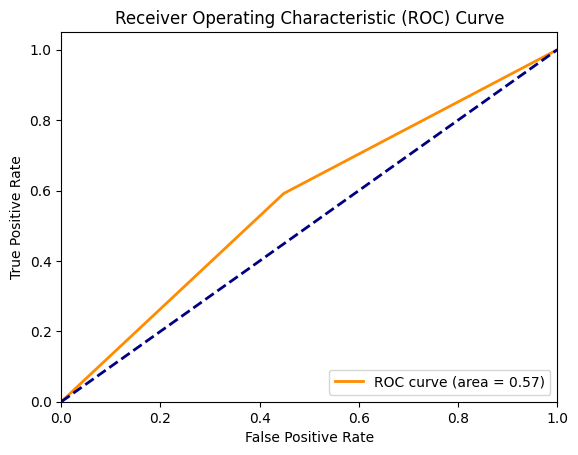

ROC AUC score: 0.571533551687958
=============UNDERSAMPLE=============
(74860, 1280) (74860,) (112038, 1280) (112038,)
Sensitivity (Recall): 0.64
Specificity (True Negative Rate): 0.57
              precision    recall  f1-score   support

         0.0       0.94      0.57      0.71    102680
         1.0       0.12      0.64      0.20      9358

    accuracy                           0.57    112038
   macro avg       0.53      0.60      0.45    112038
weighted avg       0.88      0.57      0.67    112038

f1_score 0.19980900363563256
precision_score 0.11848039897474617
recall_score 0.6372088053002778
roc_auc_score 0.6025642779910036
confusion_matrix
 [[58314 44366]
 [ 3395  5963]]


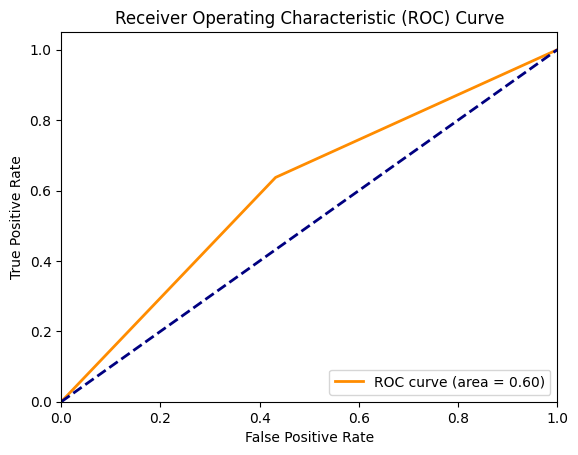

ROC AUC score: 0.6025642779910036


In [6]:
data_array = load_embedding_file(base_dir + 'pathogenecity_nt_noncoding.csv')
Classify("UNDERSAMPLE",data_array) 

data_array = load_embedding_file(base_dir + 'pathogenecity_nt_missense.csv')
Classify("UNDERSAMPLE",data_array) 

### DNABERT2

In [4]:
# # import pandas as pd
# base_dir = '../embeddings/pathogenecity/embedding-csv/'
# df=pd.read_csv(base_dir + 'pathogenecity_dnabert2_noncoding.csv', nrows=200000)

# column_names = [f'{i}' for i in range(1, len(df.columns))]
# column_names.extend(['y'])
    
#     # Assign new column names to the DataFrame
# df.columns = column_names

# df

=============UNDERSAMPLE=============
(2056, 768) (2056,) (19152, 768) (19152,)
Sensitivity (Recall): 0.51
Specificity (True Negative Rate): 0.55
              precision    recall  f1-score   support

         0.0       0.99      0.55      0.71     18895
         1.0       0.02      0.51      0.03       257

    accuracy                           0.55     19152
   macro avg       0.50      0.53      0.37     19152
weighted avg       0.97      0.55      0.70     19152

f1_score 0.029147982062780266
precision_score 0.015006348839893801
recall_score 0.5058365758754864
roc_auc_score 0.5271178116212574
confusion_matrix
 [[10362  8533]
 [  127   130]]


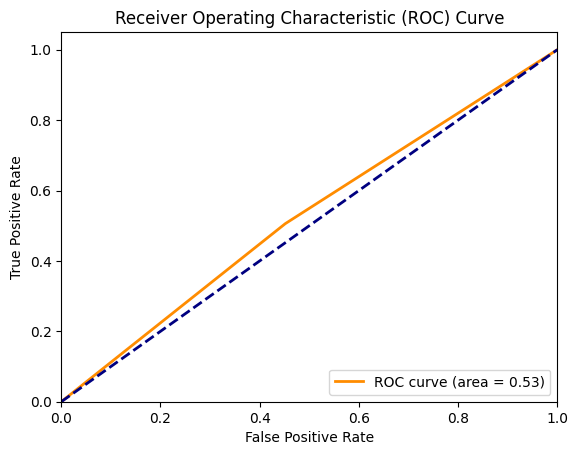

ROC AUC score: 0.5271178116212574
=============UNDERSAMPLE=============
(74860, 768) (74860,) (112038, 768) (112038,)
Sensitivity (Recall): 0.62
Specificity (True Negative Rate): 0.57
              precision    recall  f1-score   support

         0.0       0.94      0.57      0.71    102680
         1.0       0.12      0.62      0.20      9358

    accuracy                           0.57    112038
   macro avg       0.53      0.60      0.45    112038
weighted avg       0.87      0.57      0.67    112038

f1_score 0.19580044576274028
precision_score 0.11610851634701382
recall_score 0.6242786920282112
roc_auc_score 0.5955781851259092
confusion_matrix
 [[58207 44473]
 [ 3516  5842]]


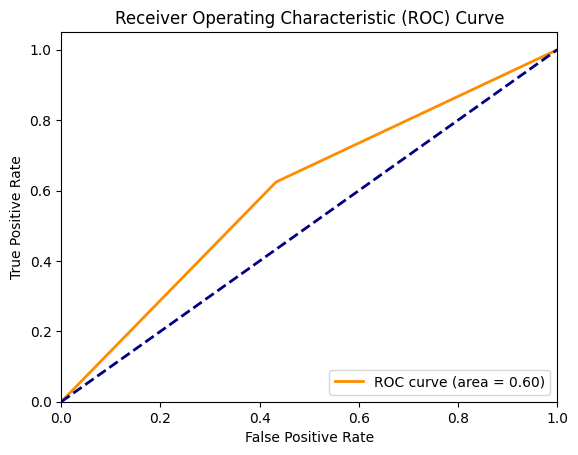

ROC AUC score: 0.5955781851259092


In [7]:
data_array = load_embedding_file(base_dir + 'pathogenecity_dnabert2_noncoding.csv')
Classify("UNDERSAMPLE",data_array) 

data_array = load_embedding_file(base_dir + 'pathogenecity_dnabert2_missense.csv')
Classify("UNDERSAMPLE",data_array)  

### HyenaDNA

In [17]:
# # import pandas as pd
# base_dir = '../embeddings/pathogenecity/embedding-csv/'
# df=pd.read_csv(base_dir + 'pathogenecity_hyena_noncoding.csv', nrows=200000)

# column_names = [f'{i}' for i in range(1, len(df.columns) )]
# column_names.extend([ 'y'])

# df.columns = column_names
# # df = df.drop(['CHROM', 'REF', 'ALT', 'POS'], axis=1)

# df

=============UNDERSAMPLE=============
(2056, 256) (2056,) (19152, 256) (19152,)
Sensitivity (Recall): 0.54
Specificity (True Negative Rate): 0.57
              precision    recall  f1-score   support

         0.0       0.99      0.57      0.73     18895
         1.0       0.02      0.54      0.03       257

    accuracy                           0.57     19152
   macro avg       0.50      0.56      0.38     19152
weighted avg       0.98      0.57      0.72     19152

f1_score 0.032989201376527826
precision_score 0.01701346389228886
recall_score 0.5408560311284046
roc_auc_score 0.5579114767973328
confusion_matrix
 [[10864  8031]
 [  118   139]]


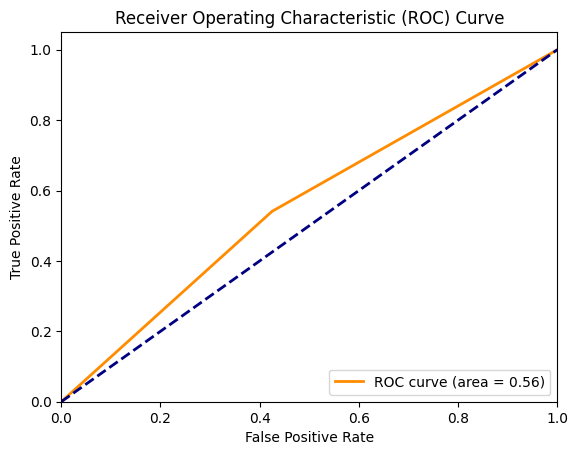

ROC AUC score: 0.5579114767973328
=============UNDERSAMPLE=============
(74860, 256) (74860,) (112038, 256) (112038,)
Sensitivity (Recall): 0.68
Specificity (True Negative Rate): 0.57
              precision    recall  f1-score   support

         0.0       0.95      0.57      0.72    102680
         1.0       0.13      0.68      0.21      9358

    accuracy                           0.58    112038
   macro avg       0.54      0.63      0.46    112038
weighted avg       0.88      0.58      0.67    112038

f1_score 0.21292634908882868
precision_score 0.1263605679934493
recall_score 0.6761060055567429
roc_auc_score 0.6250417055442461
confusion_matrix
 [[58936 43744]
 [ 3031  6327]]


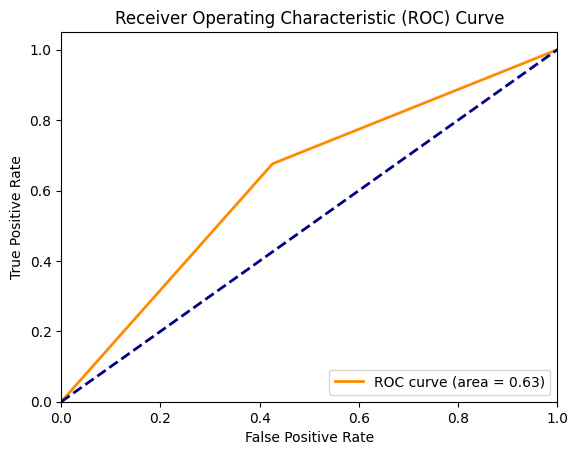

ROC AUC score: 0.6250417055442461


In [8]:
data_array = load_embedding_file(base_dir + 'pathogenecity_hyena_noncoding.csv')
Classify("UNDERSAMPLE",data_array) 

data_array = load_embedding_file(base_dir + 'pathogenecity_hyena_missense.csv')
Classify("UNDERSAMPLE",data_array)  

### Caduceus

In [24]:
# import pandas as pd
# base_dir = '../embeddings/pathogenecity/embedding-csv/'
# df=pd.read_csv(base_dir + 'pathogenecity_caduceus_noncoding.csv', nrows=2000)

# df

In [ ]:
# import glob
# import os

# def load_embedding_file(csv_file_dir):
    

#     if os.path.exists(csv_file_dir):
#         df=pd.read_csv(csv_file_dir)

#         # df = df.drop(columns=['sequence'])
#         # first_col = df.iloc[:, 0]  # Get the first column
#         # df = df.drop(df.columns[0], axis=1)  # Drop the first column
#         # df[first_col.name] = first_col  # Add it back as the last column
        
#         data_array = df.to_numpy()

    
#     else:    
#         # Path to the folder containing CSV files
#         csv_files = glob.glob(csv_file_dir)  # Adjust the folder path
        
#         # Read and concatenate all CSV files into one DataFrame
#         df = dd.concat([dd.read_csv(f) for f in csv_files], ignore_index=True)
#         # df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
        
#         df = df.drop(['chromosome', 'ref_forward_sequence', 'alt_forward_sequence', 'position'], axis=1)
    
#         first_col = df.iloc[:, 0]  # Get the first column
#         df = df.drop(df.columns[0], axis=1)  # Drop the first column
#         df[first_col.name] = first_col  # Add it back as the last column
        
#         df_pandas = df.compute()
#         data_array = df_pandas.to_numpy()
        
#     return data_array


=============UNDERSAMPLE=============
(2056, 256) (2056,) (19152, 256) (19152,)
Sensitivity (Recall): 0.58
Specificity (True Negative Rate): 0.59
              precision    recall  f1-score   support

         0.0       0.99      0.59      0.74     18895
         1.0       0.02      0.58      0.04       257

    accuracy                           0.58     19152
   macro avg       0.50      0.58      0.39     19152
weighted avg       0.98      0.58      0.73     19152

f1_score 0.036134351885534134
precision_score 0.018648310387984982
recall_score 0.5797665369649806
roc_auc_score 0.5823945148439617
confusion_matrix
 [[11054  7841]
 [  108   149]]


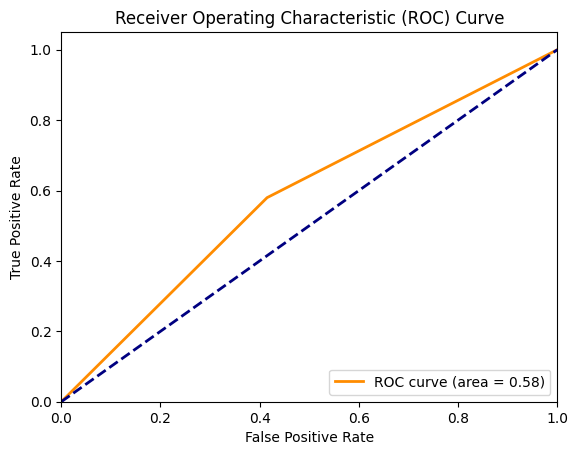

ROC AUC score: 0.5823945148439617
=============UNDERSAMPLE=============
(74860, 256) (74860,) (112038, 256) (112038,)
Sensitivity (Recall): 0.70
Specificity (True Negative Rate): 0.59
              precision    recall  f1-score   support

         0.0       0.95      0.59      0.73    102680
         1.0       0.13      0.70      0.22      9358

    accuracy                           0.59    112038
   macro avg       0.54      0.64      0.47    112038
weighted avg       0.89      0.59      0.68    112038

f1_score 0.22274354012911177
precision_score 0.13262372300727962
recall_score 0.6950203034836504
roc_auc_score 0.6403763379514084
confusion_matrix
 [[60143 42537]
 [ 2854  6504]]


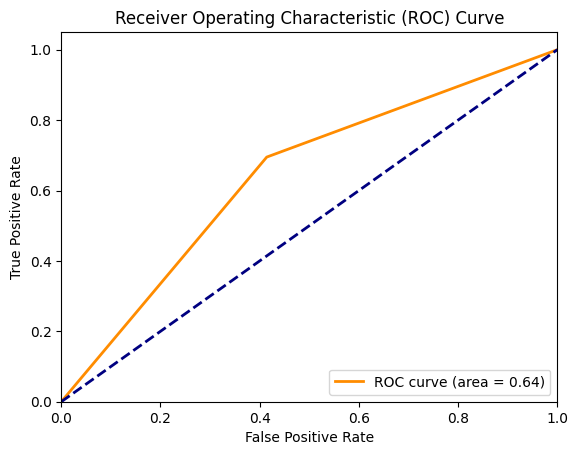

ROC AUC score: 0.6403763379514084


In [9]:
data_array = load_embedding_file(base_dir + 'pathogenecity_caduceus_noncoding.csv')
Classify("UNDERSAMPLE",data_array) 

data_array = load_embedding_file(base_dir + 'pathogenecity_caduceus_missense.csv')
Classify("UNDERSAMPLE",data_array) 